## Enzyme Kinetics Analysis


You are studying enzyme activity of fumarase. Fumarase is a tetrameric enzyme that catalyzes the conversion of fumarate to malate. 

![fumarase](1fuo2.jpg) (https://commons.wikimedia.org/wiki/File:1fuo2.jpg)
![reaction](Reaction1.png) (https://en.wikipedia.org/wiki/Fumarase)

You are using the the non-natural substrate chlorofumarate: ![chlorofumarate](chlorofumarate.png)  This molecule absorbs strongly in the UV, but the reaction product does not, giving a spectroscopic signal you can observe to follow reaction progress.  

## Tasks

You have Product vs. Time data for both wildtype fumarase and a mutant form of the enzyme. These were done at a variety of substrate concentrations, given in micromolar in the data filenames (e.g. S=200 means $[S]_{0} = 200 \mu M$. All experimental output can be found in the `data` directory. 
+ Create P vs. t plots for each experiment and extract $k$.
+ Use this information to determine $V_{0}$ for each $[S]_{0}$.
+ Construct $[S]_{0}$ vs. $V_{0}$ curves and extract Michaelis-Menten parameters.
+ Determine the effect of the mutation on these values.
+ Come up with a hypothesis for what the mutation might be doing to have the observed effect.

In [40]:
# import libraries
import numpy as np
import scipy.optimize as optimize
import scipy.stats as stats
import matplotlib.pylab as plt
import pandas as pd
import glob
%matplotlib inline

In [73]:
# Define functions for fitting models

# ------- First order kinetics equations ----------

def first_order(t,k,S0):
    return S0*(1 - np.exp(-k*t))
    
def first_order_residuals(k,S0,t,obs):
    return obs - first_order(t,k,S0)

def fit_first_order(filename):

    d = pd.read_csv(filename)
    S0 = float(filename.split("=")[1].split(".")[0])
    
    k_guess = 0.1
    
    fit_param, covariance, info_dict, message, error = optimize.leastsq(first_order_residuals,
                                                                        x0=np.array((k_guess)),
                                                                        args=(S0,d.t,d.P),full_output=True)
    
    print("S0 = ",S0)
    print("k = ",fit_param[0])
    #print("V = ",fit_param[0]*S0)
    
    plt.plot(d.t,d.P,"o")
    plt.plot(d.t,first_order(d.t,fit_param[0],S0))
    plt.title(filename)
    plt.xlabel("t (s)")
    plt.ylabel("product (uM)")
    plt.show()
    
    #return fit_param[0]*S0

# --------- Michaelis-Menten equation -----------------

def mm(S,kcat,Km,Et=5):    
    return kcat*Et*(S/(S + Km))

def mm_residuals(param,S,obs):
    
    kcat = param[0]
    Km = param[1]
    return obs - mm(S,kcat,Km)
    
def fit_mm(S,V):
    
    kcat_guess = 10
    Km_guess = 100
    
    S = np.array(S)
    V = np.array(V)
    
    fit_param, covariance, info_dict, message, error = optimize.leastsq(mm_residuals,
                                                                        x0=np.array((kcat_guess,Km_guess)),
                                                                        args=(S,V),full_output=True)
    print("kcat = ",fit_param[0])
    print("Km = ",fit_param[1])
    
    fit_S = np.arange(S[0],S[-1])
    
    plt.plot(S,V,"o")
    plt.plot(fit_S,mm(fit_S,fit_param[0],fit_param[1]))
    plt.title("MM fit")
    plt.xlabel("[S]0 (uM)")
    plt.ylabel("V0 (uM/s)")
    plt.show()

# ------------ Combined Hill and Michaelis-Menten euqations ---------------
    
def mm_hill(S,kcat,Km,n,Et=5):
    return kcat*Et*(S**n/(S**n + Km**n))

def mm_hill_residuals(param,S,obs):
    
    kcat = param[0]
    Km = param[1]
    n = param[2]
    
    return obs - mm_hill(S,kcat,Km,n)
    
def fit_mm_hill(S,V):
    
    kcat_guess = .03
    Km_guess = 10.
    n_guess = 3
    
    S = np.array(S)
    V = np.array(V)
    
    fit_param, covariance, info_dict, message, error = optimize.leastsq(mm_hill_residuals,
                                                                        x0=np.array((kcat_guess,Km_guess,n_guess)),
                                                                        args=(S,V),full_output=True)
    print("kcat = ",fit_param[0])
    print("Km = ",fit_param[1])
    print("n = ",fit_param[2])
        
    fit_S = np.arange(S[0],S[-1])
    
    plt.plot(S,V,"o")
    plt.plot(fit_S,mm_hill(fit_S,fit_param[0],fit_param[1],fit_param[2]))
    plt.title("MM fit")
    plt.xlabel("[S]0 (uM)")
    plt.ylabel("V0 (uM/s)")
    plt.show()   
    

S0 =  100.0
k =  0.23737373945008364


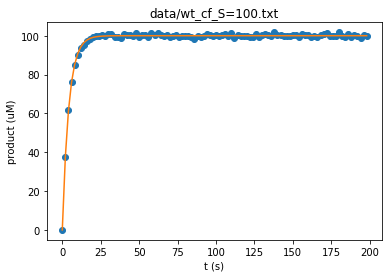

In [74]:
# Fit to wildtype P vs. t data at [S] = 100 uM
V = fit_first_order("data/wt_cf_S=100.txt")

kcat =  5.0570806810318425
Km =  1.4543499975941445


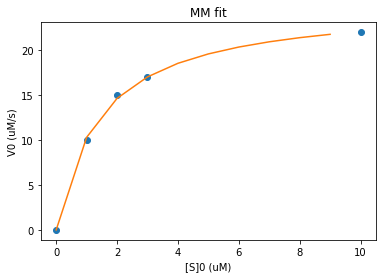

In [75]:
# Dummy fit of made-up [S] vs. [V] data
fit_mm([0,1,2,3,10],[0,10,15,17,22])

kcat =  10.122185047329166
Km =  116.8805331315918


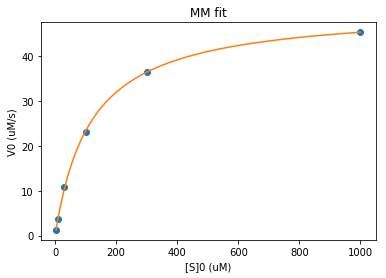

kcat =  10.036394919990338
Km =  111.01468340559632
n =  3.7996309244607396


/Users/harmsm/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in true_divide


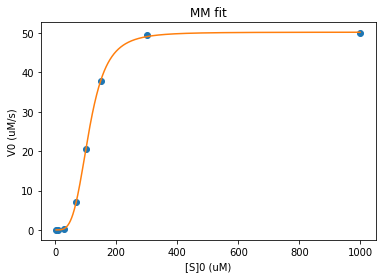

In [62]:




#for x in glob.glob("mut*.txt"):
#    V = fit_first_order(x)
    
# 3 1.34 0.002
# 10 3.72 0.004
# 30 10.79 0.27
# 70       7.12
# 100 23.02 20.53
# 150       37.75
# 300 36.54 49.43
# 1000 45.30 49.94



fit_mm([3,10,30,100,300,1000],[1.34,3.72,10.79,23.02,36.54,45.30])
#fit_mm_hill([3,10,30,70,100,150,200,300,1000],[0.002,0.004,0.27,7.12,20.53,37.75,46.5,49.43,49.94])
fit_mm_hill([3,10,30,70,100,150,300,1000],[0.002,0.004,0.27,7.12,20.53,37.75,49.43,49.94])

For fumarase operating on chlorofumarate:

$$k_{cat} = 20\ s^{-1}$$
$$K_{M} = 110\ \mu M$$

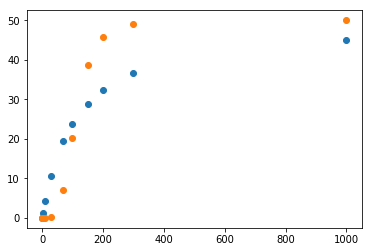

In [64]:
S = np.array([0,3,10,30,70,100,150,200,300,1000])
V = mm(S,10,110,5)
Vhill = mm_hill(S,10,110,4)

plt.plot(S,V,"o")
plt.plot(S,Vhill,"o")
plt.show()

0 nan 0.0
3 [0.44406867] 1.3274336283185841
10 [0.420769] 4.166666666666666
30 [0.36395577] 10.714285714285714
70 [0.27884818] 19.444444444444446
100 [0.23680629] 23.809523809523807
150 [0.19045564] 28.846153846153843
200 [0.15975465] 32.25806451612903
300 [0.12230598] 36.58536585365854
1000 [0.04468861] 45.04504504504504


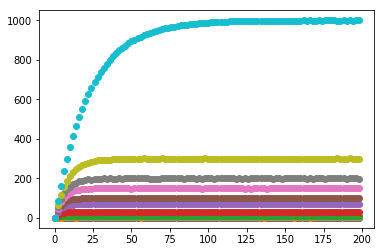

In [66]:
t = np.arange(0,200,2)

for i in range(len(S)):
    
    v = V[i]
    
    if S[i] == 0.0:
        P = np.zeros(len(t),dtype=np.float)
        k = np.nan
    else:
        k = v/S[i] + np.random.normal(0,0.01*v/S[i],1)
        P = first_order(t,k,S[i]) + np.random.normal(0,0.7,len(t))
    
    print(S[i],k,v)
    
    P[P < 0] = 0.0
    
    f = open("wt_cf_S={}.txt".format(S[i]),"w")
    f.write("t,P\n")
    for j in range(len(t)):
        f.write("{},{}\n".format(t[j],P[j]))
    f.close()
    
    plt.plot(t,P,"o")
plt.show()
    